# Data Augmentation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


plots() function provided by fast.ai

In [2]:
def plots(ims,figsize=(12,6),rows=1,interp=False,titles=None):
    if(type(ims[0]) is np.ndarray):
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
        f = plt.figure(figsize=figsize)
        cols=len(ims)
        for i in range(len(ims)):
            sp = f.add_subplot(rows,cols,i+1)
            sp.axis('Off')
            if titles is not None:
                sp.set_title(titles[i],fontsize=16)
            plt.imshow(ims[i],interpolation=None if interp else 'none')

- Now we will define a variable gen as an ImageDataGenerator
- All the parameters passed are the different ways we are telling Keras to Augment the image

In [3]:
gen = ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,
                         shear_range = 0.15, zoom_range = 0.1, channel_shift_range=80,horizontal_flip=True)

**Explaination**

In [4]:
image_path = 'images/architect.jpg'

Now we will read the image

In [5]:
image = np.expand_dims(plt.imread(image_path),0)

In [6]:
len(image)

1

Since we read only one image

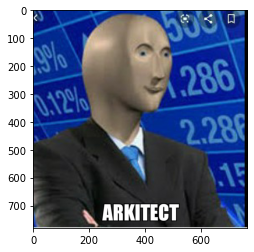

In [7]:
plt.imshow(image[0])

Now we will generate batches of Augmented image from Original Image

In [8]:
aug_iter = gen.flow(image)

```python
flow()
```
- This function takes numpy data and generates batches of augmented data
- Now we will get ten samples of augmented images

In [9]:
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

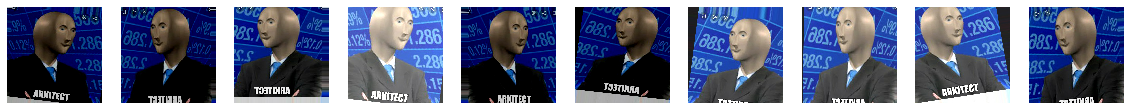

In [10]:
plots(aug_images,figsize=(20,7))

These 10 images have been augmented from the original image we passed to image data generator earlier

## Saving Images

In [11]:
from keras.preprocessing.image import img_to_array,save_img

In [12]:
for i in range(10):
    save_img('images/augmented_architect/architect_aug'+str(i+1)+'.jpg',aug_images[i])